### wlasl video

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("risangbaskoro/wlasl-processed")

print("Path to dataset files:", path)

/home/pandu/anaconda3/envs/snet/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 4.82G/4.82G [06:51<00:00, 12.6MB/s]  

Extracting files...


Path to dataset files: /home/pandu/.cache/kagglehub/datasets/risangbaskoro/wlasl-processed/versions/5


### explore wlasl

In [12]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Change to the dataset directory
os.chdir('/home/pandu/.cache/kagglehub/datasets/risangbaskoro/wlasl-processed/versions/5')

# List all files in the directory
print("Files in directory:")
files = os.listdir('.')
print(files)

# Load the main JSON file
with open('WLASL_v0.3.json', 'r') as f:
    wlasl_data = json.load(f)

# Load the subset JSON files
with open('nslt_100.json', 'r') as f:
    nslt_100 = json.load(f)
    
with open('nslt_300.json', 'r') as f:
    nslt_300 = json.load(f)
    
with open('nslt_1000.json', 'r') as f:
    nslt_1000 = json.load(f)
    
with open('nslt_2000.json', 'r') as f:
    nslt_2000 = json.load(f)

# Check the size of the dataset
print(f"\nNumber of glosses/words in WLASL_v0.3.json: {len(wlasl_data)}")
print(f"Number of entries in nslt_100.json: {len(nslt_100)}")
print(f"Number of entries in nslt_300.json: {len(nslt_300)}")
print(f"Number of entries in nslt_1000.json: {len(nslt_1000)}")
print(f"Number of entries in nslt_2000.json: {len(nslt_2000)}")

# Examine the structure of the main dataset
print("\nStructure of a WLASL entry:")
print(json.dumps(wlasl_data[0], indent=2))

# Count total number of videos
total_videos = sum(len(entry['instances']) for entry in wlasl_data)
print(f"\nTotal number of video instances: {total_videos}")

# Get distribution of videos per gloss/word
videos_per_gloss = [len(entry['instances']) for entry in wlasl_data]
print("\nVideos per gloss statistics:")
print(f"Min: {min(videos_per_gloss)}")
print(f"Max: {max(videos_per_gloss)}")
print(f"Mean: {np.mean(videos_per_gloss):.2f}")
print(f"Median: {np.median(videos_per_gloss)}")

# Check the number of unique signers
signer_ids = []
for entry in wlasl_data:
    for instance in entry['instances']:
        if 'signer_id' in instance:
            signer_ids.append(instance['signer_id'])
unique_signers = len(set(signer_ids))
print(f"\nNumber of unique signers: {unique_signers}")

# Check video sources
video_urls = []
for entry in wlasl_data:
    for instance in entry['instances']:
        if 'url' in instance:
            video_urls.append(instance['url'])

# Extract domains from URLs
from urllib.parse import urlparse
domains = [urlparse(url).netloc for url in video_urls if url]
domain_counts = Counter(domains)

print("\nVideo sources:")
for domain, count in domain_counts.most_common():
    print(f"{domain}: {count} videos ({count/len(video_urls)*100:.2f}%)")

# Check video durations if available
durations = []
for entry in wlasl_data:
    for instance in entry['instances']:
        if 'frame_end' in instance and 'frame_start' in instance and 'fps' in instance:
            duration = (instance['frame_end'] - instance['frame_start']) / instance['fps']
            durations.append(duration)

if durations:
    print("\nVideo duration statistics (seconds):")
    print(f"Min: {min(durations):.2f}")
    print(f"Max: {max(durations):.2f}")
    print(f"Mean: {np.mean(durations):.2f}")
    print(f"Median: {np.median(durations):.2f}")

# Check the videos directory content
if os.path.exists('videos'):
    video_files = os.listdir('videos')
    print(f"\nNumber of video files in videos directory: {len(video_files)}")
    
    # Check some video file extensions
    extensions = [os.path.splitext(f)[1] for f in video_files]
    extension_counts = Counter(extensions)
    print("Video file extensions:")
    for ext, count in extension_counts.most_common():
        print(f"{ext}: {count}")

# Check class lists
with open('wlasl_class_list.txt', 'r') as f:
    class_list = f.read().splitlines()
print(f"\nNumber of classes in class list: {len(class_list)}")
print("Sample classes:", class_list[:10])

# Check for any missing videos info
if os.path.exists('missing.txt'):
    with open('missing.txt', 'r') as f:
        missing_videos = f.read().splitlines()
    print(f"\nNumber of missing videos listed: {len(missing_videos)}")
    if missing_videos:
        print("Sample missing video entries:", missing_videos[:5])

Files in directory:
['nslt_100.json', 'wlasl_class_list.txt', 'nslt_2000.json', 'nslt_300.json', 'nslt_1000.json', 'missing.txt', 'videos', 'WLASL_v0.3.json']

Number of glosses/words in WLASL_v0.3.json: 2000
Number of entries in nslt_100.json: 2038
Number of entries in nslt_300.json: 5118
Number of entries in nslt_1000.json: 13174
Number of entries in nslt_2000.json: 21095

Structure of a WLASL entry:
{
  "gloss": "book",
  "instances": [
    {
      "bbox": [
        385,
        37,
        885,
        720
      ],
      "fps": 25,
      "frame_end": -1,
      "frame_start": 1,
      "instance_id": 0,
      "signer_id": 118,
      "source": "aslbrick",
      "split": "train",
      "url": "http://aslbricks.org/New/ASL-Videos/book.mp4",
      "variation_id": 0,
      "video_id": "69241"
    },
    {
      "bbox": [
        190,
        25,
        489,
        370
      ],
      "fps": 25,
      "frame_end": -1,
      "frame_start": 1,
      "instance_id": 1,
      "signer_id": 90,


In [13]:
import json
import pandas as pd

# Load the main WLASL data file
with open('WLASL_v0.3.json', 'r') as f:
    wlasl_data = json.load(f)

# Create a list to store video duration information
video_durations = []

# Process each entry in the dataset
for entry in wlasl_data:
    gloss = entry['gloss']
    for instance in entry['instances']:
        if 'frame_end' in instance and 'frame_start' in instance and 'fps' in instance:
            # Calculate duration in seconds
            # Handle the case where frame_end is -1 (indicating end of video is not specified)
            if instance['frame_end'] != -1:
                duration = (instance['frame_end'] - instance['frame_start']) / instance['fps']
            else:
                # For videos where end is not specified, we'll mark as -1
                duration = -1
                
            # Only include videos with meaningful duration values
            if duration > 0:
                video_durations.append({
                    'gloss': gloss,
                    'video_id': instance.get('video_id', 'unknown'),
                    'url': instance.get('url', 'unknown'),
                    'duration': duration,
                    'source': instance.get('source', 'unknown'),
                    'signer_id': instance.get('signer_id', 'unknown')
                })

# Create a DataFrame and sort by duration
df_durations = pd.DataFrame(video_durations)
top_20_longest = df_durations.sort_values('duration', ascending=False).head(20)

# Display the results
print(f"Top 20 longest videos in the WLASL dataset:")
for i, (_, video) in enumerate(top_20_longest.iterrows(), 1):
    print(f"{i}. Gloss: {video['gloss']}, Duration: {video['duration']:.2f}s, Source: {video['source']}")
    print(f"   URL: {video['url']}")
    print(f"   Video ID: {video['video_id']}, Signer ID: {video['signer_id']}")
    print("---")

Top 20 longest videos in the WLASL dataset:
1. Gloss: people, Duration: 7.08s, Source: northtexas
   URL: https://www.youtube.com/watch?v=VwejDy96MzM
   Video ID: 70144, Signer ID: 121
---
2. Gloss: cabinet, Duration: 6.96s, Source: northtexas
   URL: https://www.youtube.com/watch?v=jDCw7stJaM4
   Video ID: 70081, Signer ID: 121
---
3. Gloss: top, Duration: 6.40s, Source: northtexas
   URL: https://www.youtube.com/watch?v=F5Wef1_PtLk
   Video ID: 70165, Signer ID: 121
---
4. Gloss: appointment, Duration: 6.12s, Source: northtexas
   URL: https://www.youtube.com/watch?v=F5Wef1_PtLk
   Video ID: 70155, Signer ID: 121
---
5. Gloss: careful, Duration: 5.96s, Source: northtexas
   URL: https://www.youtube.com/watch?v=2DblIQ5n6xk
   Video ID: 70200, Signer ID: 121
---
6. Gloss: join, Duration: 5.92s, Source: lillybauer
   URL: https://www.youtube.com/watch?v=WPVk8I02I6M
   Video ID: 69006, Signer ID: 113
---
7. Gloss: cool, Duration: 5.88s, Source: northtexas
   URL: https://www.youtube.com/

In [3]:
import os
import json
from collections import Counter
from urllib.parse import urlparse

# Change working directory
os.chdir('/home/pandu/.cache/kagglehub/datasets/risangbaskoro/wlasl-processed/versions/5')

# Verify we're in the right directory
print(f"Current directory: {os.getcwd()}")
print(f"Files in directory: {os.listdir('.')}")

# Load the JSON file
with open('WLASL_v0.3.json', 'r') as f:
    wlasl_data = json.load(f)

# Extract all URLs from the data
urls = []
for sign in wlasl_data:
    gloss = sign.get('gloss', '')
    for instance in sign.get('instances', []):
        if 'url' in instance:
            urls.append(instance['url'])
            # Optional: print to verify correct structure
            # print(f"Gloss: {gloss}, URL: {instance['url']}")

# Extract domain names from URLs
domains = []
for url in urls:
    parsed_url = urlparse(url)
    # Get the domain (netloc)
    domain = parsed_url.netloc
    if domain:
        domains.append(domain)
    else:
        # If netloc is empty, try to extract from the path (for incomplete URLs)
        path_parts = parsed_url.path.split('/')
        if len(path_parts) > 1 and path_parts[0] == '':
            domains.append(path_parts[1])
        else:
            domains.append("unknown")

# Count unique domains
domain_counts = Counter(domains)

print(f"\nTotal number of URLs: {len(urls)}")
print(f"Number of unique websites: {len(domain_counts)}")
print("\nList of unique websites and their counts:")
for domain, count in domain_counts.most_common():
    print(f"- {domain}: {count}")

Current directory: /home/pandu/.cache/kagglehub/datasets/risangbaskoro/wlasl-processed/versions/5
Files in directory: ['nslt_100.json', 'wlasl_class_list.txt', 'nslt_2000.json', 'nslt_300.json', 'nslt_1000.json', 'missing.txt', 'videos', 'WLASL_v0.3.json']

Total number of URLs: 21083
Number of unique websites: 13

List of unique websites and their counts:
- www.youtube.com: 4321
- www.signingsavvy.com: 2668
- www.handspeak.com: 2211
- signstock.blob.core.windows.net: 1968
- www.aslsearch.com: 1875
- media.asldeafined.com: 1833
- www.aslpro.com: 1736
- media.spreadthesign.com: 1584
- aslsignbank.haskins.yale.edu: 1071
- youtu.be: 814
- s3-us-west-1.amazonaws.com: 623
- aslbricks.org: 218
- elementalaslconcepts.weebly.com: 161


In [4]:
import os
import json
from collections import Counter

# Change working directory
os.chdir('/home/pandu/.cache/kagglehub/datasets/risangbaskoro/wlasl-processed/versions/5')

# Verify we're in the right directory
print(f"Current directory: {os.getcwd()}")
print(f"Files in directory: {os.listdir('.')}")

# Load the JSON file
with open('WLASL_v0.3.json', 'r') as f:
    wlasl_data = json.load(f)

# Get all glosses and count their instances
gloss_counts = {}
total_instances = 0

for sign in wlasl_data:
    gloss = sign.get('gloss', '')
    instances = sign.get('instances', [])
    instance_count = len(instances)
    
    gloss_counts[gloss] = instance_count
    total_instances += instance_count

# Sort glosses by count (descending)
sorted_glosses = sorted(gloss_counts.items(), key=lambda x: x[1], reverse=True)

# Print statistics
print(f"\nTotal number of unique glosses: {len(gloss_counts)}")
print(f"Total number of instances across all glosses: {total_instances}")
print(f"Average instances per gloss: {total_instances / len(gloss_counts) if gloss_counts else 0:.2f}")

# Print the top glosses with most instances
print("\nTop 20 glosses with most instances:")
for i, (gloss, count) in enumerate(sorted_glosses[:20]):
    print(f"{i+1}. '{gloss}': {count} instances")

# Print the glosses with fewest instances
print("\nGlosses with fewest instances:")
for i, (gloss, count) in enumerate(sorted_glosses[-10:]):
    print(f"{len(sorted_glosses)-9+i}. '{gloss}': {count} instances")

# Count distribution
counts = Counter(gloss_counts.values())
print("\nInstance count distribution:")
for count, frequency in sorted(counts.items()):
    print(f"{count} instance(s): {frequency} glosses")

Current directory: /home/pandu/.cache/kagglehub/datasets/risangbaskoro/wlasl-processed/versions/5
Files in directory: ['nslt_100.json', 'wlasl_class_list.txt', 'nslt_2000.json', 'nslt_300.json', 'nslt_1000.json', 'missing.txt', 'videos', 'WLASL_v0.3.json']

Total number of unique glosses: 2000
Total number of instances across all glosses: 21083
Average instances per gloss: 10.54

Top 20 glosses with most instances:
1. 'book': 40 instances
2. 'drink': 35 instances
3. 'computer': 30 instances
4. 'before': 26 instances
5. 'chair': 26 instances
6. 'go': 26 instances
7. 'clothes': 25 instances
8. 'who': 25 instances
9. 'candy': 24 instances
10. 'cousin': 23 instances
11. 'deaf': 23 instances
12. 'fine': 22 instances
13. 'help': 22 instances
14. 'no': 22 instances
15. 'thin': 22 instances
16. 'walk': 22 instances
17. 'year': 22 instances
18. 'yes': 22 instances
19. 'all': 21 instances
20. 'black': 21 instances

Glosses with fewest instances:
1991. 'visualize': 7 instances
1992. 'vlog': 7 ins

In [7]:
import os
import json
from collections import Counter
from urllib.parse import urlparse
from tqdm import tqdm  # Optional: for progress bars

# --- Configuration ---
# Adjust this path to the root directory of your dataset
DATASET_BASE_PATH = '/home/pandu/.cache/kagglehub/datasets/risangbaskoro/wlasl-processed/versions/5'
JSON_FILENAME = 'WLASL_v0.3.json'
VIDEOS_DIRNAME = 'videos'
# --- End Configuration ---

# Construct full paths
json_file_path = os.path.join(DATASET_BASE_PATH, JSON_FILENAME)
videos_dir_path = os.path.join(DATASET_BASE_PATH, VIDEOS_DIRNAME)

# --- Input Validation ---
if not os.path.isfile(json_file_path):
    print(f"Error: JSON file not found at {json_file_path}")
    exit()
if not os.path.isdir(videos_dir_path):
    print(f"Error: Videos directory not found at {videos_dir_path}")
    exit()

print(f"Analyzing dataset at: {DATASET_BASE_PATH}")
print("-" * 30)

# --- 1. Load JSON Data ---
print(f"Loading JSON file: {JSON_FILENAME}...")
try:
    with open(json_file_path, 'r') as f:
        wlasl_data = json.load(f)
    print(f"Successfully loaded {len(wlasl_data)} entries (glosses).")
except json.JSONDecodeError:
    print(f"Error: Failed to decode JSON from {json_file_path}")
    exit()
except Exception as e:
    print(f"An unexpected error occurred while loading JSON: {e}")
    exit()

# --- Initialize Data Structures for Analysis ---
unique_base_urls = set()
all_glosses = set()
split_counts = Counter()
json_video_ids = set()
total_instances = 0

# --- 2 & 3. Process JSON Data (Get URLs, Instances, Classes, Splits) ---
print("Processing JSON data...")
for entry in tqdm(wlasl_data, desc="Analyzing JSON entries"):
    gloss = entry.get('gloss')
    if gloss:
        all_glosses.add(gloss)

    instances = entry.get('instances', [])
    total_instances += len(instances)

    for instance in instances:
        # Get unique base URLs
        url_str = instance.get('url')
        if url_str:
            try:
                parsed_url = urlparse(url_str)
                # Ensure scheme and netloc exist (e.g., http://example.com)
                if parsed_url.scheme and parsed_url.netloc:
                    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
                    unique_base_urls.add(base_url)
                # Handle cases like just 'youtube' (less likely with full URLs)
                # You might need more specific logic if base URLs aren't standard
                elif parsed_url.netloc: # if only domain is present
                     unique_base_urls.add(parsed_url.netloc)
                elif parsed_url.path and '.' in parsed_url.path.split('/')[0]: # guess domain from path
                     unique_base_urls.add(parsed_url.path.split('/')[0])

            except Exception as e:
                print(f"Warning: Could not parse URL: {url_str} - {e}")


        # Count splits
        split = instance.get('split')
        if split:
            split_counts[split] += 1

        # Collect video IDs mentioned in JSON
        video_id = instance.get('video_id')
        if video_id:
            # Ensure video_id is treated as a string, consistent with filenames
            json_video_ids.add(str(video_id))

print("Finished processing JSON.")
print("-" * 30)

# --- 4. Process Video Directory ---
print(f"Scanning videos directory: {videos_dir_path}...")
try:
    # Use a generator expression for memory efficiency if dir is huge
    # listdir can still be slow for very large directories
    video_files_on_disk = (f for f in os.listdir(videos_dir_path)
                           if os.path.isfile(os.path.join(videos_dir_path, f)) and f.lower().endswith('.mp4'))

    # Extract video IDs (filename without extension) from disk
    # Use tqdm here if listing/processing filenames takes time
    disk_video_ids = set()
    # Convert generator to list for tqdm or process directly
    video_files_list = list(video_files_on_disk)
    for filename in tqdm(video_files_list, desc="Scanning video files"):
         video_id_on_disk = os.path.splitext(filename)[0]
         disk_video_ids.add(video_id_on_disk)

    print(f"Found {len(disk_video_ids)} '.mp4' files in the directory.")

except FileNotFoundError:
    print(f"Error: Videos directory disappeared during scan: {videos_dir_path}")
    exit()
except Exception as e:
    print(f"An error occurred while scanning the video directory: {e}")
    exit()

print("-" * 30)

# --- Compare JSON vs Disk Videos ---
print("Comparing JSON video IDs with files on disk...")
videos_in_json_not_on_disk = sorted(list(json_video_ids - disk_video_ids))
videos_on_disk_not_in_json = sorted(list(disk_video_ids - json_video_ids))
print("Comparison complete.")
print("-" * 30)

# --- Print Results ---

# 1. Unique Base URLs
print("\n--- Analysis Results ---")
print("\n1. Unique Base URLs found in JSON:")
if unique_base_urls:
    for base_url in sorted(list(unique_base_urls)):
        print(f"  - {base_url}")
else:
    print("  - No valid base URLs found.")

# 2. Instance and Class Information
print("\n2. Instance and Class Information:")
print(f"  - Total number of instances defined in JSON: {total_instances}")
print(f"  - Number of unique classes (glosses): {len(all_glosses)}")
# Uncomment the next line if you want to see all class names (can be long)
# print(f"  - Class names: {sorted(list(all_glosses))}")

# 3. Split Counts
print("\n3. Data Split Counts (from JSON instances):")
print(f"  - Train: {split_counts.get('train', 0)}")
print(f"  - Validation: {split_counts.get('val', 0)}")
print(f"  - Test: {split_counts.get('test', 0)}")
other_splits = {k: v for k, v in split_counts.items() if k not in ['train', 'val', 'test']}
if other_splits:
    print("  - Other splits found:", other_splits)

# 4. File Consistency Check
print("\n4. Video File Consistency Check:")
print(f"\n  - Videos listed in JSON but MISSING in '{VIDEOS_DIRNAME}' directory ({len(videos_in_json_not_on_disk)}):")
if videos_in_json_not_on_disk:
    # Print first few and last few if the list is very long
    if len(videos_in_json_not_on_disk) > 20:
        print(f"    {videos_in_json_not_on_disk[:10]} ... {videos_in_json_not_on_disk[-10:]}")
    else:
        print(f"    {videos_in_json_not_on_disk}")
    # You could also write this list to a file if needed:
    # with open('missing_videos.txt', 'w') as f_missing:
    #     for vid in videos_in_json_not_on_disk:
    #         f_missing.write(f"{vid}.mp4\n")
    # print("    (Full list saved to missing_videos.txt)") # Optional file output
else:
    print("    - None. All videos listed in JSON are present.")

print(f"\n  - Videos present in '{VIDEOS_DIRNAME}' directory but NOT LISTED in JSON ({len(videos_on_disk_not_in_json)}):")
if videos_on_disk_not_in_json:
     if len(videos_on_disk_not_in_json) > 20:
        print(f"    {videos_on_disk_not_in_json[:10]} ... {videos_on_disk_not_in_json[-10:]}")
     else:
        print(f"    {videos_on_disk_not_in_json}")
     # Optional file output
     # with open('extra_videos.txt', 'w') as f_extra:
     #    for vid in videos_on_disk_not_in_json:
     #        f_extra.write(f"{vid}.mp4\n")
     # print("    (Full list saved to extra_videos.txt)") # Optional file output
else:
    print("    - None. All videos in the directory are listed in the JSON.")

print("\n--- Analysis Complete ---")

Analyzing dataset at: /home/pandu/.cache/kagglehub/datasets/risangbaskoro/wlasl-processed/versions/5
------------------------------
Loading JSON file: WLASL_v0.3.json...
Successfully loaded 2000 entries (glosses).
Processing JSON data...


Analyzing JSON entries: 100%|██████████| 2000/2000 [00:00<00:00, 22986.90it/s]


Finished processing JSON.
------------------------------
Scanning videos directory: /home/pandu/.cache/kagglehub/datasets/risangbaskoro/wlasl-processed/versions/5/videos...


Scanning video files: 100%|██████████| 11980/11980 [00:00<00:00, 1491252.77it/s]

Found 11980 '.mp4' files in the directory.
------------------------------
Comparing JSON video IDs with files on disk...
Comparison complete.
------------------------------

--- Analysis Results ---

1. Unique Base URLs found in JSON:
  - http://aslbricks.org
  - http://www.aslpro.com
  - http://www.aslsearch.com
  - https://aslsignbank.haskins.yale.edu
  - https://elementalaslconcepts.weebly.com
  - https://media.asldeafined.com
  - https://media.spreadthesign.com
  - https://s3-us-west-1.amazonaws.com
  - https://signstock.blob.core.windows.net
  - https://www.handspeak.com
  - https://www.signingsavvy.com
  - https://www.youtube.com
  - https://youtu.be

2. Instance and Class Information:
  - Total number of instances defined in JSON: 21083
  - Number of unique classes (glosses): 2000

3. Data Split Counts (from JSON instances):
  - Train: 14289
  - Validation: 3916
  - Test: 2878

4. Video File Consistency Check:

  - Videos listed in JSON but MISSING in 'videos' directory (9103):


In [6]:
import os
import json
from pprint import pprint
from collections import Counter, defaultdict
import numpy as np # For calculating statistics like mean/median

# --- Configuration ---
DATASET_DIR = '/home/pandu/.cache/kagglehub/datasets/risangbaskoro/wlasl-processed/versions/5'
JSON_FILE = os.path.join(DATASET_DIR, 'WLASL_v0.3.json')
VIDEO_DIR = os.path.join(DATASET_DIR, 'videos')

# --- Load Data ---
print(f"Loading JSON data from: {JSON_FILE}")
try:
    with open(JSON_FILE, 'r') as f:
        wlasl_data = json.load(f)
    print("JSON data loaded successfully.")
except FileNotFoundError:
    print(f"Error: JSON file not found at {JSON_FILE}")
    exit()
except json.JSONDecodeError:
    print(f"Error: Could not decode JSON from {JSON_FILE}")
    exit()

# --- High-Level Structure Analysis ---
print("\n--- High-Level Structure Analysis ---")
print(f"Data type: {type(wlasl_data)}")

if isinstance(wlasl_data, list):
    print(f"Number of top-level entries: {len(wlasl_data)}")
    if len(wlasl_data) > 0:
        print(f"Type of the first entry: {type(wlasl_data[0])}")
        if isinstance(wlasl_data[0], dict):
            print(f"Keys in the first entry: {list(wlasl_data[0].keys())}")
        else:
            print("Warning: First entry is not a dictionary as expected.")
    else:
        print("Warning: JSON array is empty.")
else:
    print("Warning: Expected top-level structure to be a list, but it's not.")
    # If it's not a list, we might need different analysis logic
    # For now, assume it's the expected list structure based on prior info
    if not isinstance(wlasl_data, list): exit()


# --- Entry-Level Analysis ('gloss' level) ---
print("\n--- Entry-Level Analysis ('gloss' level) ---")
all_entry_keys = set()
glosses = []
instance_counts_per_gloss = []
entries_with_missing_keys = 0
entries_with_unexpected_types = 0

for i, entry in enumerate(wlasl_data):
    if not isinstance(entry, dict):
        entries_with_unexpected_types += 1
        continue

    current_keys = set(entry.keys())
    if i == 0:
        all_entry_keys = current_keys
    elif current_keys != all_entry_keys:
        entries_with_missing_keys += 1
        # Optionally track which keys are different/missing
        # print(f"Warning: Entry {i} has different keys: {current_keys} vs expected {all_entry_keys}")

    if 'gloss' in entry and isinstance(entry['gloss'], str):
        glosses.append(entry['gloss'])
    else:
        print(f"Warning: Entry {i} missing 'gloss' key or it's not a string.")

    if 'instances' in entry and isinstance(entry['instances'], list):
        instance_counts_per_gloss.append(len(entry['instances']))
    else:
        instance_counts_per_gloss.append(0)
        print(f"Warning: Entry {i} (gloss: {entry.get('gloss', 'N/A')}) missing 'instances' key or it's not a list.")

print(f"Total number of entries processed: {len(wlasl_data)}")
print(f"Number of entries with unexpected types (not dict): {entries_with_unexpected_types}")
print(f"Number of entries with key structure different from the first entry: {entries_with_missing_keys}")
print(f"All entries seem to consistently have the keys: {all_entry_keys}")

# Gloss analysis
unique_glosses = set(glosses)
print(f"\nNumber of unique glosses (sign words): {len(unique_glosses)}")
if len(glosses) != len(unique_glosses):
    print(f"Warning: Duplicate gloss entries found. Total gloss entries: {len(glosses)}, Unique: {len(unique_glosses)}")
    gloss_counts = Counter(glosses)
    duplicates = {g: count for g, count in gloss_counts.items() if count > 1}
    print(f"Duplicate glosses: {duplicates}")
else:
    print("Each entry corresponds to a unique gloss.")

# Instances per gloss analysis
print("\nAnalysis of number of instances per gloss:")
print(f"  Minimum instances per gloss: {min(instance_counts_per_gloss) if instance_counts_per_gloss else 'N/A'}")
print(f"  Maximum instances per gloss: {max(instance_counts_per_gloss) if instance_counts_per_gloss else 'N/A'}")
print(f"  Average instances per gloss: {np.mean(instance_counts_per_gloss):.2f}" if instance_counts_per_gloss else 'N/A')
print(f"  Median instances per gloss: {np.median(instance_counts_per_gloss):.2f}" if instance_counts_per_gloss else 'N/A')
zero_instance_glosses = sum(1 for count in instance_counts_per_gloss if count == 0)
print(f"  Number of glosses with zero instances: {zero_instance_glosses}")


# --- Instance-Level Analysis ---
print("\n--- Instance-Level Analysis ---")
all_instances = []
all_instance_keys = set()
instances_with_missing_keys = 0
instances_with_unexpected_types = 0
consistent_instance_keys = None

for entry in wlasl_data:
    if isinstance(entry.get('instances'), list):
        for i, instance in enumerate(entry['instances']):
            if not isinstance(instance, dict):
                instances_with_unexpected_types += 1
                continue

            all_instances.append(instance)
            current_instance_keys = set(instance.keys())

            if consistent_instance_keys is None: # First valid instance found
                consistent_instance_keys = current_instance_keys
            elif current_instance_keys != consistent_instance_keys:
                instances_with_missing_keys += 1
                # print(f"Warning: Instance {i} in gloss '{entry.get('gloss', 'N/A')}' has different keys: {current_instance_keys} vs expected {consistent_instance_keys}")

            all_instance_keys.update(current_instance_keys) # Track all keys ever seen

total_instances = len(all_instances)
print(f"Total number of instances across all glosses: {total_instances}")
print(f"Number of instances with unexpected types (not dict): {instances_with_unexpected_types}")
print(f"Number of instances with key structure different from the first found instance: {instances_with_missing_keys}")
if consistent_instance_keys is not None:
    print(f"Keys found in the first valid instance (assumed standard): {sorted(list(consistent_instance_keys))}")
    if len(all_instance_keys) != len(consistent_instance_keys):
        print(f"Warning: Variations in instance keys found across the dataset!")
        print(f"Union of all keys found across all instances: {sorted(list(all_instance_keys))}")
        print(f"Keys potentially missing in some instances: {sorted(list(all_instance_keys - consistent_instance_keys))}")
        print(f"Keys potentially extra in some instances (compared to first): {sorted(list(consistent_instance_keys - all_instance_keys))}") # This case is less likely if consistent_instance_keys was set first
else:
    print("No valid instances found to determine standard keys.")


# Detailed analysis of common instance fields (if instances exist)
if total_instances > 0 and consistent_instance_keys is not None:
    print("\nDetailed analysis of common instance fields:")

    # video_id
    video_ids = [inst.get('video_id') for inst in all_instances if 'video_id' in inst]
    unique_video_ids = set(video_ids)
    print(f"\nField 'video_id':")
    print(f"  Total non-null values: {len(video_ids)} (out of {total_instances})")
    print(f"  Number of unique video_ids: {len(unique_video_ids)}")
    print(f"  Example video_id: {video_ids[0] if video_ids else 'N/A'}")
    all_video_ids_are_strings = all(isinstance(vid, str) for vid in video_ids)
    print(f"  All video_ids are strings: {all_video_ids_are_strings}")

    # split
    splits = [inst.get('split') for inst in all_instances if 'split' in inst]
    split_counts = Counter(splits)
    print(f"\nField 'split':")
    print(f"  Total non-null values: {len(splits)}")
    print(f"  Unique split values and counts: {dict(split_counts)}")

    # source
    sources = [inst.get('source') for inst in all_instances if 'source' in inst]
    source_counts = Counter(sources)
    print(f"\nField 'source':")
    print(f"  Total non-null values: {len(sources)}")
    print(f"  Number of unique sources: {len(source_counts)}")
    print(f"  Unique source values and counts (Top 10): {dict(source_counts.most_common(10))}")

    # fps (Frames Per Second)
    fps_values = [inst.get('fps') for inst in all_instances if 'fps' in inst]
    valid_fps = [f for f in fps_values if isinstance(f, (int, float))]
    print(f"\nField 'fps':")
    print(f"  Total non-null values: {len(fps_values)}")
    print(f"  Valid numerical FPS values: {len(valid_fps)}")
    if valid_fps:
        fps_counts = Counter(valid_fps)
        print(f"  Unique FPS values and counts: {dict(fps_counts)}")
        print(f"  Min FPS: {min(valid_fps)}")
        print(f"  Max FPS: {max(valid_fps)}")
    else:
        print("  No valid numerical FPS values found.")

    # frame_start / frame_end
    frame_starts = [inst.get('frame_start') for inst in all_instances if 'frame_start' in inst]
    frame_ends = [inst.get('frame_end') for inst in all_instances if 'frame_end' in inst]
    valid_starts = [fs for fs in frame_starts if isinstance(fs, int)]
    valid_ends = [fe for fe in frame_ends if isinstance(fe, int)]
    print(f"\nFields 'frame_start' / 'frame_end':")
    print(f"  Total non-null frame_start: {len(frame_starts)}")
    print(f"  Total non-null frame_end: {len(frame_ends)}")
    print(f"  Valid integer frame_start: {len(valid_starts)}")
    print(f"  Valid integer frame_end: {len(valid_ends)}")
    if valid_starts: print(f"  Min frame_start: {min(valid_starts)}")
    if valid_ends:
        print(f"  Min frame_end: {min(valid_ends)}")
        print(f"  Max frame_end: {max(valid_ends)}")
        frame_end_minus_one_count = sum(1 for fe in valid_ends if fe == -1)
        print(f"  Count where frame_end is -1: {frame_end_minus_one_count} (often indicates end of video)")

    # bbox (Bounding Box)
    bboxes = [inst.get('bbox') for inst in all_instances if 'bbox' in inst]
    print(f"\nField 'bbox':")
    print(f"  Total non-null values: {len(bboxes)}")
    all_bboxes_are_lists = all(isinstance(b, list) for b in bboxes)
    print(f"  All bbox values are lists: {all_bboxes_are_lists}")
    if bboxes and all_bboxes_are_lists:
        bbox_lengths = Counter(len(b) for b in bboxes)
        print(f"  Lengths of bbox lists and counts: {dict(bbox_lengths)}")
        if len(bbox_lengths) == 1 and list(bbox_lengths.keys())[0] == 4:
             print("  Bounding boxes consistently seem to have 4 values (e.g., [x, y, width, height] or [x1, y1, x2, y2]).")
        else:
             print("  Warning: Variation found in bbox list lengths.")
        # Example bbox structure
        print(f"  Example bbox: {bboxes[0]}")
        all_coords_numeric = all(isinstance(coord, (int, float)) for bbox_list in bboxes for coord in bbox_list if isinstance(bbox_list, list))
        print(f"  All coordinates within bboxes appear numeric: {all_coords_numeric}")


    # signer_id
    signer_ids = [inst.get('signer_id') for inst in all_instances if 'signer_id' in inst]
    valid_signer_ids = [sid for sid in signer_ids if isinstance(sid, int)]
    print(f"\nField 'signer_id':")
    print(f"  Total non-null values: {len(signer_ids)}")
    print(f"  Valid integer signer_ids: {len(valid_signer_ids)}")
    unique_signers = set(valid_signer_ids)
    print(f"  Number of unique signers: {len(unique_signers)}")
    if valid_signer_ids: print(f"  Min signer_id: {min(valid_signer_ids)}, Max signer_id: {max(valid_signer_ids)}")

    # url
    urls = [inst.get('url') for inst in all_instances if 'url' in inst]
    print(f"\nField 'url':")
    print(f"  Total non-null values: {len(urls)}")
    all_urls_are_strings = all(isinstance(u, str) for u in urls)
    print(f"  All url values are strings: {all_urls_are_strings}")
    if urls: print(f"  Example url: {urls[0]}")

    # Other IDs (instance_id, variation_id) - basic check
    instance_ids = [inst.get('instance_id') for inst in all_instances if 'instance_id' in inst]
    variation_ids = [inst.get('variation_id') for inst in all_instances if 'variation_id' in inst]
    print(f"\nFields 'instance_id' / 'variation_id':")
    print(f"  Non-null instance_id count: {len(instance_ids)}")
    print(f"  Non-null variation_id count: {len(variation_ids)}")
    # Could add unique counts or range checks if needed


# --- Relationship with Video Files ---
print("\n--- Relationship with Video Files ---")
if os.path.exists(VIDEO_DIR) and os.path.isdir(VIDEO_DIR):
    print(f"Checking contents of video directory: {VIDEO_DIR}")
    try:
        video_files = {f for f in os.listdir(VIDEO_DIR) if f.endswith('.mp4')}
        print(f"Found {len(video_files)} .mp4 files in the directory.")

        if total_instances > 0:
            json_video_ids_with_ext = {f"{vid}.mp4" for vid in unique_video_ids if isinstance(vid, str)}

            # Videos mentioned in JSON but not found in directory
            missing_files = json_video_ids_with_ext - video_files
            if missing_files:
                print(f"Warning: {len(missing_files)} videos mentioned in JSON are missing from the '{VIDEO_DIR}' directory.")
                print(f"  Examples of missing files: {list(missing_files)[:10]}")
                # Compare with missing.txt if it exists
                missing_txt_file = os.path.join(DATASET_DIR, 'missing.txt')
                if os.path.exists(missing_txt_file):
                    try:
                        with open(missing_txt_file, 'r') as f_miss:
                             missing_from_txt = {line.strip() for line in f_miss if line.strip()}
                        print(f"  ({len(missing_from_txt)} entries found in missing.txt)")
                        if missing_files == missing_from_txt:
                            print("  This matches the content of 'missing.txt'.")
                        else:
                            print("  Warning: This list differs from 'missing.txt'.")
                    except Exception as e:
                        print(f"  Could not read or compare with missing.txt: {e}")

            else:
                print("All videos mentioned in the JSON seem to be present in the directory.")

            # Videos found in directory but not mentioned in JSON
            extra_files = video_files - json_video_ids_with_ext
            if extra_files:
                print(f"Warning: {len(extra_files)} video files found in '{VIDEO_DIR}' are not referenced in the JSON.")
                print(f"  Examples of extra files: {list(extra_files)[:10]}")
            else:
                print("All video files in the directory seem to be referenced in the JSON.")
        else:
            print("Skipping video file comparison as no instances were found in JSON.")

    except OSError as e:
        print(f"Error accessing video directory {VIDEO_DIR}: {e}")
else:
    print(f"Video directory not found at: {VIDEO_DIR}. Cannot check file relationships.")


# --- Hypothesized Content of Other Files ---
print("\n--- Hypothesized Content of Other Files (Based on Names) ---")
print(f"- nslt_100.json, nslt_300.json, nslt_1000.json, nslt_2000.json:")
print("  Likely contain subsets of the main WLASL data, filtered to include only the top N (100, 300, 1000, 2000) most frequent or otherwise selected glosses.")
print("  The format might be identical or slightly adapted for specific tasks (e.g., model training). 'nslt_2000.json' might be very similar or identical to 'WLASL_v0.3.json' if WLASL contains 2000 glosses.")
print(f"- wlasl_class_list.txt:")
print("  Probably a simple text file listing all the unique gloss names (classes), one per line, likely corresponding to the 2000 glosses in the main JSON.")
print(f"- missing.txt:")
print("  As verified above (if possible), this file likely lists the video IDs (e.g., '01234.mp4') that were originally part of the dataset definition but whose corresponding video files could not be obtained or are intentionally excluded.")


print("\n--- Analysis Complete ---")

Loading JSON data from: /home/pandu/.cache/kagglehub/datasets/risangbaskoro/wlasl-processed/versions/5/WLASL_v0.3.json
JSON data loaded successfully.

--- High-Level Structure Analysis ---
Data type: <class 'list'>
Number of top-level entries: 2000
Type of the first entry: <class 'dict'>
Keys in the first entry: ['gloss', 'instances']

--- Entry-Level Analysis ('gloss' level) ---
Total number of entries processed: 2000
Number of entries with unexpected types (not dict): 0
Number of entries with key structure different from the first entry: 0
All entries seem to consistently have the keys: {'instances', 'gloss'}

Number of unique glosses (sign words): 2000
Each entry corresponds to a unique gloss.

Analysis of number of instances per gloss:
  Minimum instances per gloss: 6
  Maximum instances per gloss: 40
  Average instances per gloss: 10.54
  Median instances per gloss: 10.00
  Number of glosses with zero instances: 0

--- Instance-Level Analysis ---
Total number of instances across a

### explore wlasl that some data is inside same video

In [14]:
import json
from collections import Counter
import os

# --- Configuration ---
# Assuming the WLASL_v0.3.json file is in the same directory as the script,
# or you can provide the full path.
json_file_path = 'WLASL_v0.3.json'

# --- Verification Script ---
video_id_counts = Counter()
total_instances = 0

try:
    with open(json_file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # The WLASL_v0.3.json structure is a list of dictionaries,
    # where each dictionary represents a gloss and contains a list of instances.
    if isinstance(data, list):
        for gloss_entry in data:
            if 'instances' in gloss_entry and isinstance(gloss_entry['instances'], list):
                for instance in gloss_entry['instances']:
                    if 'video_id' in instance:
                        video_id_counts[instance['video_id']] += 1
                        total_instances += 1
            else:
                 print(f"Warning: Gloss entry without 'instances' list found: {gloss_entry.get('gloss', 'Unknown Gloss')}")
    else:
        print(f"Error: Expected top-level data to be a list, but got {type(data)}")


except FileNotFoundError:
    print(f"Error: File not found at {json_file_path}")
    print("Please make sure the WLASL_v0.3.json file is in the correct location.")
    exit()
except json.JSONDecodeError:
    print(f"Error: Could not decode JSON from {json_file_path}")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

# --- Analysis ---
single_instance_videos = []
multiple_instances_videos = []

for video_id, count in video_id_counts.items():
    if count == 1:
        single_instance_videos.append(video_id)
    else:
        multiple_instances_videos.append(video_id)

# --- Report ---
print("\n--- Video Instance Analysis ---")
print(f"Total video instances found in JSON: {total_instances}")
print(f"Total unique video IDs found in JSON: {len(video_id_counts)}")
print("-" * 30)
print(f"Number of video IDs linked to EXACTLY ONE instance: {len(single_instance_videos)}")
print(f"Number of video IDs linked to MULTIPLE instances: {len(multiple_instances_videos)}")
print("-" * 30)

if len(multiple_instances_videos) > 0:
    print("Examples of video IDs with MULTIPLE instances (need cutting):")
    # Show first 5 or all if less than 5
    for video_id in multiple_instances_videos[:min(5, len(multiple_instances_videos))]:
        print(f"- Video ID: {video_id} (appears {video_id_counts[video_id]} times)")
    if len(multiple_instances_videos) > 5:
        print("...")
else:
    print("No video IDs found with multiple instances.")


if len(single_instance_videos) > 0:
    print("\nExamples of video IDs with a SINGLE instance (may not strictly need cutting, but checking frame_start/end is still good practice):")
     # Show first 5 or all if less than 5
    for video_id in single_instance_videos[:min(5, len(single_instance_videos))]:
         print(f"- Video ID: {video_id}")
    if len(single_instance_videos) > 5:
        print("...")
else:
     print("No video IDs found with a single instance.")

# --- Cross-check with videos directory (optional) ---
# This part is just to show which of these IDs *exist* as files
videos_dir = 'videos' # Assuming 'videos' directory is in the current path

if os.path.isdir(videos_dir):
    video_files = {f.split('.')[0] for f in os.listdir(videos_dir) if f.endswith('.mp4')}

    multiple_existing = [vid for vid in multiple_instances_videos if vid in video_files]
    single_existing = [vid for vid in single_instance_videos if vid in video_files]

    print(f"\n--- Cross-check with '{videos_dir}' directory ---")
    print(f"Number of video files found in '{videos_dir}': {len(video_files)}")
    print(f"Number of multiple-instance video IDs found as files: {len(multiple_existing)}")
    print(f"Number of single-instance video IDs found as files: {len(single_existing)}")
    print(f"Number of video IDs from JSON (total {len(video_id_counts)}) NOT found as files: {len(video_id_counts) - len(video_files)}")

else:
    print(f"\nCould not find the '{videos_dir}' directory for cross-checking.")


--- Video Instance Analysis ---
Total video instances found in JSON: 21083
Total unique video IDs found in JSON: 21083
------------------------------
Number of video IDs linked to EXACTLY ONE instance: 21083
Number of video IDs linked to MULTIPLE instances: 0
------------------------------
No video IDs found with multiple instances.

Examples of video IDs with a SINGLE instance (may not strictly need cutting, but checking frame_start/end is still good practice):
- Video ID: 69241
- Video ID: 65225
- Video ID: 68011
- Video ID: 68208
- Video ID: 68012
...

--- Cross-check with 'videos' directory ---
Number of video files found in 'videos': 11980
Number of multiple-instance video IDs found as files: 0
Number of single-instance video IDs found as files: 11980
Number of video IDs from JSON (total 21083) NOT found as files: 9103


In [16]:
import json
import os

# --- Configuration ---
json_file_path = 'WLASL_v0.3.json'
videos_dir = 'videos' # Directory containing downloaded videos
top_n_longest = 50

# --- Load Data and File List ---
data = None
video_files = set()

try:
    with open(json_file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    if os.path.isdir(videos_dir):
        video_files = {f.split('.')[0] for f in os.listdir(videos_dir) if f.endswith('.mp4')}
    else:
        print(f"Warning: '{videos_dir}' directory not found. Cannot check file existence.")

except FileNotFoundError:
    print(f"Error: File not found at {json_file_path}")
    exit()
except json.JSONDecodeError:
    print(f"Error: Could not decode JSON from {json_file_path}")
    exit()
except Exception as e:
    print(f"An unexpected error occurred during loading: {e}")
    exit()

# --- Calculate Durations and Collect Data ---
calculable_durations = []
instances_with_negative_frame_end = []

if data:
    if isinstance(data, list):
        for gloss_entry in data:
            gloss = gloss_entry.get('gloss', 'Unknown')
            if 'instances' in gloss_entry and isinstance(gloss_entry['instances'], list):
                for instance in gloss_entry['instances']:
                    video_id = instance.get('video_id')
                    frame_start = instance.get('frame_start')
                    frame_end = instance.get('frame_end')
                    fps = instance.get('fps')
                    url = instance.get('url')

                    if video_id is None or frame_start is None or frame_end is None or fps is None or url is None:
                         # Skip incomplete instances
                         continue

                    if frame_end > 0 and fps > 0:
                        try:
                            # Duration in seconds
                            duration = (frame_end - frame_start + 1) / fps
                            calculable_durations.append({
                                'duration': duration,
                                'video_id': video_id,
                                'gloss': gloss,
                                'url': url,
                                'frame_start': frame_start,
                                'frame_end': frame_end,
                                'fps': fps
                            })
                        except ZeroDivisionError:
                             print(f"Warning: Instance for video_id {video_id} has fps=0. Skipping duration calculation.")
                    elif frame_end == -1:
                         instances_with_negative_frame_end.append({
                                'video_id': video_id,
                                'gloss': gloss,
                                'url': url,
                                'frame_start': frame_start,
                                'frame_end': frame_end,
                                'fps': fps
                         })
    else:
         print(f"Error: Expected top-level data to be a list, but got {type(data)}")


# --- Sort and Get Top N ---
calculable_durations.sort(key=lambda x: x['duration'], reverse=True)
top_longest = calculable_durations[:top_n_longest]

# --- Report Top N Longest ---
print(f"\n--- Top {top_n_longest} Longest Video Instances (based on calculable duration > 0) ---")

if not top_longest:
    print("No instances with calculable duration found.")
else:
    for i, entry in enumerate(top_longest):
        file_exists = entry['video_id'] in video_files
        print(f"\n{i+1}.")
        print(f"  Gloss: {entry['gloss']}")
        print(f"  Video ID: {entry['video_id']}")
        print(f"  Calculated Duration: {entry['duration']:.2f} seconds")
        print(f"  Frames: {entry['frame_start']} to {entry['frame_end']} @ {entry['fps']} fps")
        print(f"  Source URL: {entry['url']}")
        print(f"  File Exists in '{videos_dir}': {'Yes' if file_exists else 'No'}")

# --- Report Instances with frame_end = -1 ---
print("\n--- Note: Instances with frame_end = -1 ---")
print(f"Found {len(instances_with_negative_frame_end)} instances where frame_end is -1.")
print("Their duration cannot be calculated from the JSON alone, as -1 means 'end of the clip'.")
print("These might also be long videos, but we cannot rank them here.")
if instances_with_negative_frame_end:
    print("\nExamples of instances with frame_end = -1:")
    for i, entry in enumerate(instances_with_negative_frame_end[:min(5, len(instances_with_negative_frame_end))]):
         file_exists = entry['video_id'] in video_files
         print(f"\n{i+1}.")
         print(f"  Gloss: {entry['gloss']}")
         print(f"  Video ID: {entry['video_id']}")
         print(f"  Frames: {entry['frame_start']} to {entry['frame_end']} @ {entry['fps']} fps")
         print(f"  Source URL: {entry['url']}")
         print(f"  File Exists in '{videos_dir}': {'Yes' if file_exists else 'No'}")
    if len(instances_with_negative_frame_end) > 5:
        print("...")


--- Top 50 Longest Video Instances (based on calculable duration > 0) ---

1.
  Gloss: people
  Video ID: 70144
  Calculated Duration: 7.12 seconds
  Frames: 5679 to 5856 @ 25 fps
  Source URL: https://www.youtube.com/watch?v=VwejDy96MzM
  File Exists in 'videos': No

2.
  Gloss: cabinet
  Video ID: 70081
  Calculated Duration: 7.00 seconds
  Frames: 6630 to 6804 @ 25 fps
  Source URL: https://www.youtube.com/watch?v=jDCw7stJaM4
  File Exists in 'videos': No

3.
  Gloss: top
  Video ID: 70165
  Calculated Duration: 6.44 seconds
  Frames: 4364 to 4524 @ 25 fps
  Source URL: https://www.youtube.com/watch?v=F5Wef1_PtLk
  File Exists in 'videos': No

4.
  Gloss: appointment
  Video ID: 70155
  Calculated Duration: 6.16 seconds
  Frames: 2403 to 2556 @ 25 fps
  Source URL: https://www.youtube.com/watch?v=F5Wef1_PtLk
  File Exists in 'videos': No

5.
  Gloss: careful
  Video ID: 70200
  Calculated Duration: 6.00 seconds
  Frames: 5489 to 5638 @ 25 fps
  Source URL: https://www.youtube.com/w

### download ms-asl

In [2]:
import yt_dlp
import sys # To exit if URL is not provided

# --- Configuration ---
# PASTE THE EXACT YOUTUBE VIDEO URL YOU WANT TO DOWNLOAD HERE
video_url = "https://www.youtube.com/watch?v=HPz_C5XM4o4"

# --- Basic Download ---
print(f"Attempting to download: {video_url}")

# Define basic options (optional, but good practice)
# This tries to get a decent quality mp4 file.
# It saves the file using the video's ID as the filename (e.g., 'dQw4w9WgXcQ.mp4')
# in the same directory where you run the script.
ydl_opts = {
    'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/best[ext=mp4]/best', # Prioritize mp4, fallback to best
    'outtmpl': '%(id)s.%(ext)s', # Output filename template (video_id.extension)
    # Add other options here if needed, for example:
    # 'outtmpl': 'downloads/%(title)s - %(id)s.%(ext)s', # Save to a 'downloads' subfolder with title and ID
    # 'quiet': True, # Suppress yt-dlp output messages
}

try:
    # Create a YoutubeDL object with the options
    # Using 'with' ensures resources are closed properly
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        # Start the download. Pass the URL(s) as a list.
        error_code = ydl.download([video_url])

        if error_code == 0:
            print("\nDownload finished successfully!")
        else:
            # This might not always be reached if an exception occurs first
            print(f"\nyt-dlp finished with error code: {error_code}")

except yt_dlp.utils.DownloadError as e:
    # Handle errors specifically related to downloading (video unavailable, network issues etc.)
    print(f"\nError downloading video: {e}")
except Exception as e:
    # Handle any other unexpected errors
    print(f"\nAn unexpected error occurred: {e}")

print("\nCheck the script's directory for the downloaded file.")
print("(You might need FFmpeg installed if yt-dlp needed to merge video and audio streams).")

Attempting to download: https://www.youtube.com/watch?v=HPz_C5XM4o4
[youtube] Extracting URL: https://www.youtube.com/watch?v=HPz_C5XM4o4
[youtube] HPz_C5XM4o4: Downloading webpage
[youtube] HPz_C5XM4o4: Downloading tv client config
[youtube] HPz_C5XM4o4: Downloading player 6450230e-main
[youtube] HPz_C5XM4o4: Downloading tv player API JSON
[youtube] HPz_C5XM4o4: Downloading ios player API JSON
[youtube] HPz_C5XM4o4: Downloading m3u8 information
[info] HPz_C5XM4o4: Downloading 1 format(s): 136+140
[download] Destination: HPz_C5XM4o4.f136.mp4
[download] 100% of    1.75MiB in 00:00:00 at 4.42MiB/s   
[download] Destination: HPz_C5XM4o4.f140.m4a
[download] 100% of  108.80KiB in 00:00:00 at 225.22KiB/s   
[Merger] Merging formats into "HPz_C5XM4o4.mp4"
Deleting original file HPz_C5XM4o4.f140.m4a (pass -k to keep)
Deleting original file HPz_C5XM4o4.f136.mp4 (pass -k to keep)

Download finished successfully!

Check the script's directory for the downloaded file.
(You might need FFmpeg instal

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nadayoussefamrawy/ms-asl")

print("Path to dataset files:", path)

/home/pandu/anaconda3/envs/snet/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 1.91M/1.91M [00:01<00:00, 1.80MB/s]

Extracting files...
Path to dataset files: /home/pandu/.cache/kagglehub/datasets/nadayoussefamrawy/ms-asl/versions/1


### Explore MS-ASL

In [4]:
import os
os.chdir('/home/pandu/.cache/kagglehub/datasets/nadayoussefamrawy/ms-asl/versions/1/MS-ASL')

In [17]:
import json
import os

# List all files in the directory
print("Files in directory:")
files = os.listdir('.')
print(files)

# Load JSON files
with open('MSASL_classes.json', 'r') as f:
    classes = json.load(f)

with open('MSASL_train.json', 'r') as f:
    train_data = json.load(f)
    
with open('MSASL_val.json', 'r') as f:
    val_data = json.load(f)
    
with open('MSASL_test.json', 'r') as f:
    test_data = json.load(f)

# Check number of classes
print(f"Number of classes: {len(classes)}")

# Check number of samples in each split
print(f"Number of training samples: {len(train_data)}")
print(f"Number of validation samples: {len(val_data)}")
print(f"Number of test samples: {len(test_data)}")

# Examine structure of one training sample
print("\nStructure of a training sample:")
print(json.dumps(train_data[0], indent=2))

# Check for class distribution in training set
class_counts = {}
for item in train_data:
    label = item.get('label', None)
    if label is not None:
        class_counts[label] = class_counts.get(label, 0) + 1

print(f"\nNumber of unique classes in training data: {len(class_counts)}")
print(f"Most common class appears {max(class_counts.values())} times")
print(f"Least common class appears {min(class_counts.values())} times")

# Load the synonym file if you're interested
with open('MSASL_synonym.json', 'r') as f:
    synonyms = json.load(f)
    
print(f"\nNumber of entries in synonym file: {len(synonyms)}")

Files in directory:
['nslt_100.json', 'wlasl_class_list.txt', 'nslt_2000.json', 'nslt_300.json', 'nslt_1000.json', 'missing.txt', 'videos', 'WLASL_v0.3.json']


FileNotFoundError: [Errno 2] No such file or directory: 'MSASL_classes.json'

Summary of samples per class:
       train_count    val_count   test_count  total_count
count   1000.00000  1000.000000  1000.000000  1000.000000
mean      16.05400     5.287000     4.172000    25.513000
std        9.76455     3.673708     2.429469    13.823057
min        1.00000     1.000000     1.000000    10.000000
25%        9.00000     3.000000     2.000000    15.000000
50%       13.00000     4.000000     4.000000    21.000000
75%       20.00000     7.000000     6.000000    31.000000
max       57.00000    23.000000    20.000000    85.000000

Top 40 classes with most samples:
    class_id class_name  total_count
1          1       nice           85
2          2    teacher           77
3          3        eat           77
4          4         no           73
5          5      happy           72
6          6       like           71
7          7     orange           70
8          8       want           69
9          9       deaf           69
10        10     school           68
12    

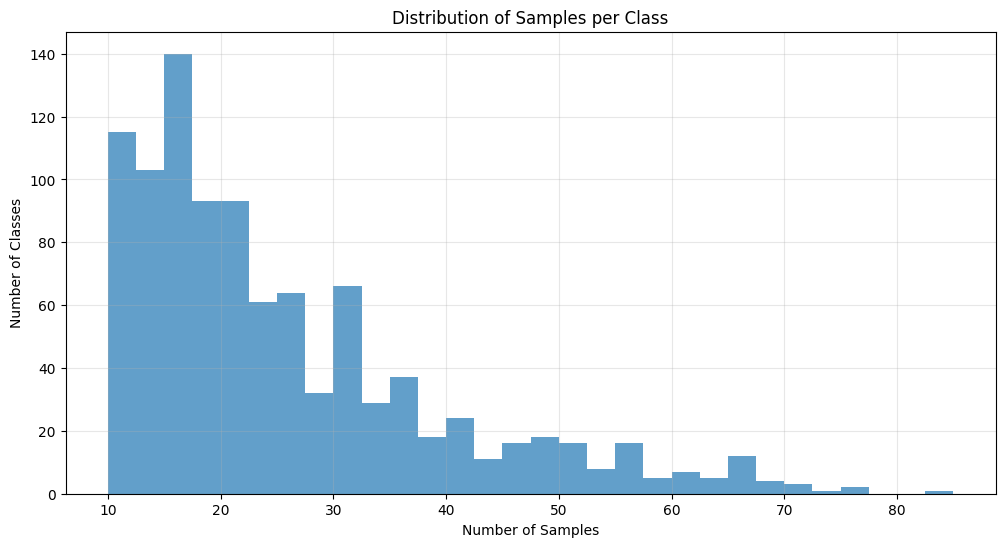


Classes with no samples in training set: 0
Classes with no samples in validation set: 0
Classes with no samples in test set: 0


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Count samples per class in each split
train_class_counts = {}
for item in train_data:
    label = item.get('label', None)
    if label is not None:
        train_class_counts[label] = train_class_counts.get(label, 0) + 1

val_class_counts = {}
for item in val_data:
    label = item.get('label', None)
    if label is not None:
        val_class_counts[label] = val_class_counts.get(label, 0) + 1

test_class_counts = {}
for item in test_data:
    label = item.get('label', None)
    if label is not None:
        test_class_counts[label] = test_class_counts.get(label, 0) + 1

# Create a DataFrame to hold all class counts
class_distribution = pd.DataFrame({
    'class_id': range(len(classes)),
    'class_name': [classes[i] for i in range(len(classes))],
    'train_count': [train_class_counts.get(i, 0) for i in range(len(classes))],
    'val_count': [val_class_counts.get(i, 0) for i in range(len(classes))],
    'test_count': [test_class_counts.get(i, 0) for i in range(len(classes))],
})

class_distribution['total_count'] = (
    class_distribution['train_count'] + 
    class_distribution['val_count'] + 
    class_distribution['test_count']
)

# Display summary statistics
print("Summary of samples per class:")
print(class_distribution[['train_count', 'val_count', 'test_count', 'total_count']].describe())

# Show classes with most samples
print("\nTop 40 classes with most samples:")
print(class_distribution.sort_values('total_count', ascending=False).head(40)[['class_id', 'class_name', 'total_count']])

# Show classes with fewest samples
print("\nBottom 40 classes with fewest samples:")
print(class_distribution.sort_values('total_count').head(40)[['class_id', 'class_name', 'total_count']])

# Count how many classes have different amounts of samples
sample_counts = class_distribution['total_count'].value_counts().sort_index()
print("\nNumber of classes with each sample count:")
print(sample_counts)

# Plot distribution of samples per class
plt.figure(figsize=(12, 6))
plt.hist(class_distribution['total_count'], bins=30, alpha=0.7)
plt.title('Distribution of Samples per Class')
plt.xlabel('Number of Samples')
plt.ylabel('Number of Classes')
plt.grid(alpha=0.3)
plt.show()

# Check for classes with zero samples in any split
missing_in_train = class_distribution[class_distribution['train_count'] == 0]
missing_in_val = class_distribution[class_distribution['val_count'] == 0]
missing_in_test = class_distribution[class_distribution['test_count'] == 0]

print(f"\nClasses with no samples in training set: {len(missing_in_train)}")
print(f"Classes with no samples in validation set: {len(missing_in_val)}")
print(f"Classes with no samples in test set: {len(missing_in_test)}")

In [10]:
from urllib.parse import urlparse
import collections

# Function to extract domain from full URL
def extract_domain(url):
    parsed_url = urlparse(url)
    return parsed_url.netloc

# Collect all URLs from the dataset
all_urls = []
for item in train_data + val_data + test_data:
    if 'url' in item and item['url']:
        all_urls.append(item['url'])

print(f"Total number of URLs found: {len(all_urls)}")

# Extract and count domains
domains = [extract_domain(url) for url in all_urls]
domain_counts = collections.Counter(domains)

print("\nDomains used in the dataset:")
for domain, count in domain_counts.most_common():
    print(f"{domain}: {count} videos ({count/len(all_urls)*100:.2f}%)")

# Sample URLs from each domain (first 2 examples)
print("\nSample URLs from each domain:")
domain_examples = {}
for url in all_urls:
    domain = extract_domain(url)
    if domain not in domain_examples:
        domain_examples[domain] = []
    if len(domain_examples[domain]) < 2:
        domain_examples[domain].append(url)

for domain, examples in domain_examples.items():
    print(f"\n{domain} examples:")
    for url in examples:
        print(f"  {url}")

Total number of URLs found: 25513

Domains used in the dataset:
www.youtube.com: 22948 videos (89.95%)
: 2565 videos (10.05%)

Sample URLs from each domain:

www.youtube.com examples:
  https://www.youtube.com/watch?v=C37R_Ix8-qs
  https://www.youtube.com/watch?v=PIsUJl8BN_I

 examples:
  www.youtube.com/watch?v=9FdHlMOnVjg
  www.youtube.com/watch?v=N2mG9ZKjrGA


In [19]:
## to check wether some data/instance is on same video:
import json
import os
from collections import defaultdict

# Assume data is already loaded as in your previous script
# If you are running this code snippet alone, uncomment and run the loading part:
# try:
#     with open('MSASL_train.json', 'r') as f:
#         train_data = json.load(f)
#     with open('MSASL_val.json', 'r') as f:
#         val_data = json.load(f)
#     with open('MSASL_test.json', 'r') as f:
#         test_data = json.load(f)
# except FileNotFoundError:
#     print("Error: Make sure MSASL_train.json, MSASL_val.json, and MSASL_test.json are in the same directory.")
#     exit()

print("Analyzing video URL usage across splits...")

# Dictionary to store information about each URL
# Key: URL
# Value: List of dictionaries, each containing info about a sample using that URL
# e.g., { 'url1': [{'split': 'train', 'label': 123, 'index_in_split': 5}, {'split': 'val', 'label': 456, 'index_in_split': 10}], ... }
url_info = defaultdict(list)

# Process training data
print(f"Processing {len(train_data)} training samples...")
for i, sample in enumerate(train_data):
    url = sample.get('url')
    label = sample.get('label')
    if url: # Only process if URL exists
        url_info[url].append({
            'split': 'train',
            'label': label,
            'index_in_split': i,
            'start_time': sample.get('start_time'),
            'end_time': sample.get('end_time')
        })

# Process validation data
print(f"Processing {len(val_data)} validation samples...")
for i, sample in enumerate(val_data):
    url = sample.get('url')
    label = sample.get('label')
    if url:
         url_info[url].append({
            'split': 'val',
            'label': label,
            'index_in_split': i,
            'start_time': sample.get('start_time'),
            'end_time': sample.get('end_time')
        })

# Process test data
print(f"Processing {len(test_data)} test samples...")
for i, sample in enumerate(test_data):
    url = sample.get('url')
    label = sample.get('label')
    if url:
         url_info[url].append({
            'split': 'test',
            'label': label,
            'index_in_split': i,
            'start_time': sample.get('start_time'),
            'end_time': sample.get('end_time')
        })

print("-" * 30)
print(f"Total unique URLs found: {len(url_info)}")

# Analyze URLs that appear more than once
shared_url_count = 0
urls_across_splits = set() # Stores URLs that appear in more than one split
urls_within_split_multi_label = set() # Stores (URL, split) tuples where URL appears >1 time with different labels
urls_within_split_same_label = set() # Stores (URL, split) tuples where URL appears >1 time with the same label


print("\nChecking for shared URLs...")
for url, samples_list in url_info.items():
    if len(samples_list) > 1:
        shared_url_count += 1
        print(f"\nURL '{url}' is used by {len(samples_list)} samples:")

        # Check for sharing across different splits
        splits_present = {sample_info['split'] for sample_info in samples_list}
        if len(splits_present) > 1:
            print(f"  -> Shared across splits: {list(splits_present)}")
            urls_across_splits.add(url)

        # Check for sharing within each split
        for split in splits_present:
            samples_in_this_split = [s for s in samples_list if s['split'] == split]
            if len(samples_in_this_split) > 1:
                 labels_in_this_split = {s['label'] for s in samples_in_this_split}
                 if len(labels_in_this_split) > 1:
                     print(f"  -> Within '{split}' split: Used by {len(samples_in_this_split)} samples with {len(labels_in_this_split)} different labels.")
                     urls_within_split_multi_label.add((url, split))
                     # Optional: print details for investigation
                     # for s in samples_in_this_split:
                     #      print(f"     - Label: {s['label']}, Time: {s['start_time']:.2f}-{s['end_time']:.2f}s, Index: {s['index_in_split']}")
                 else:
                     print(f"  -> Within '{split}' split: Used by {len(samples_in_this_split)} samples with the *same* label ({list(labels_in_this_split)[0]}).")
                     urls_within_split_same_label.add((url, split))
                     # Optional: print details for investigation
                     # for s in samples_in_this_split:
                     #      print(f"     - Label: {s['label']}, Time: {s['start_time']:.2f}-{s['end_time']:.2f}s, Index: {s['index_in_split']}")


print("-" * 30)
print("--- Summary of Shared URLs ---")
print(f"Total unique URLs: {len(url_info)}")
print(f"Number of URLs used by multiple samples: {shared_url_count}")
print(f"Number of URLs shared *across* different splits: {len(urls_across_splits)}")
print(f"Number of (URL, Split) pairs where the URL is used multiple times *within* that split for *different* labels: {len(urls_within_split_multi_label)}")
print(f"Number of (URL, Split) pairs where the URL is used multiple times *within* that split for the *same* label: {len(urls_within_split_same_label)}")

print("\n--- Conclusion ---")
if shared_url_count > 0:
    print("Yes, based on the analysis, many samples share the same source video URL.")
    print("This is the standard way sign language datasets are often structured, with different samples being segments from longer videos.")
    print("Therefore, you **will need to preprocess** the videos by downloading the full video (or parts containing the segments) and then extracting the specific segments defined by the `start_time` and `end_time` for each sample.")

    if len(urls_across_splits) > 0:
        print("\nAdditionally, some source videos are shared across the training, validation, and/or test splits.")
        print("Be mindful of this potential data leakage when training and evaluating your model. Standard practice might involve ensuring splits are done by *video* rather than by *sample* if possible, though MSASL provides pre-defined splits.")
        print("Using the provided splits means segments from the same video can appear in different sets. This might require specific evaluation strategies or careful handling if aiming for strict video-based generalization.")

    if len(urls_within_split_multi_label) > 0:
        print(f"\nWithin splits, the same URL is often used for samples with *different* labels.")
        print("This confirms that multiple distinct signs/phrases are being extracted from the same source video within a single split.")
else:
    print("No, based on the analysis, samples do not appear to share the same source video URL.")
    print("However, the presence of `start_time` and `end_time` fields still suggests that each sample might be a segment, even if from a unique video.")

Analyzing video URL usage across splits...
Processing 16054 training samples...
Processing 5287 validation samples...
Processing 4172 test samples...
------------------------------
Total unique URLs found: 7213

Checking for shared URLs...

URL 'https://www.youtube.com/watch?v=1AyT77LqJzQ' is used by 2 samples:
  -> Within 'train' split: Used by 2 samples with the *same* label (10).

URL 'https://www.youtube.com/watch?v=HPz_C5XM4o4' is used by 3 samples:
  -> Within 'train' split: Used by 3 samples with the *same* label (120).

URL 'https://www.youtube.com/watch?v=WeAFuzYTdtU' is used by 3 samples:
  -> Within 'train' split: Used by 3 samples with the *same* label (669).

URL 'https://www.youtube.com/watch?v=jQb9NL9_S6U' is used by 22 samples:
  -> Within 'train' split: Used by 22 samples with 12 different labels.

URL 'https://www.youtube.com/watch?v=0Beq_NIDj2c' is used by 2 samples:
  -> Within 'train' split: Used by 2 samples with the *same* label (52).

URL 'https://www.youtube.co